After gathering valuation metrics measuring various factors that can affect a SaaS company's performance, let's use exploratory analysis techniques to determine what factors are primary in determining a company's success. We can use MATPLOTLIB's functions to graph outliers, data distributions and correlations.

Here is the valuation metrics spreadsheet used in this code: https://docs.google.com/spreadsheets/d/1SEIanQtt9br6DuvXBDwuDBxG6fgJOGQDPQ9UH_P7HAU/edit?gid=487560076#gid=487560076 

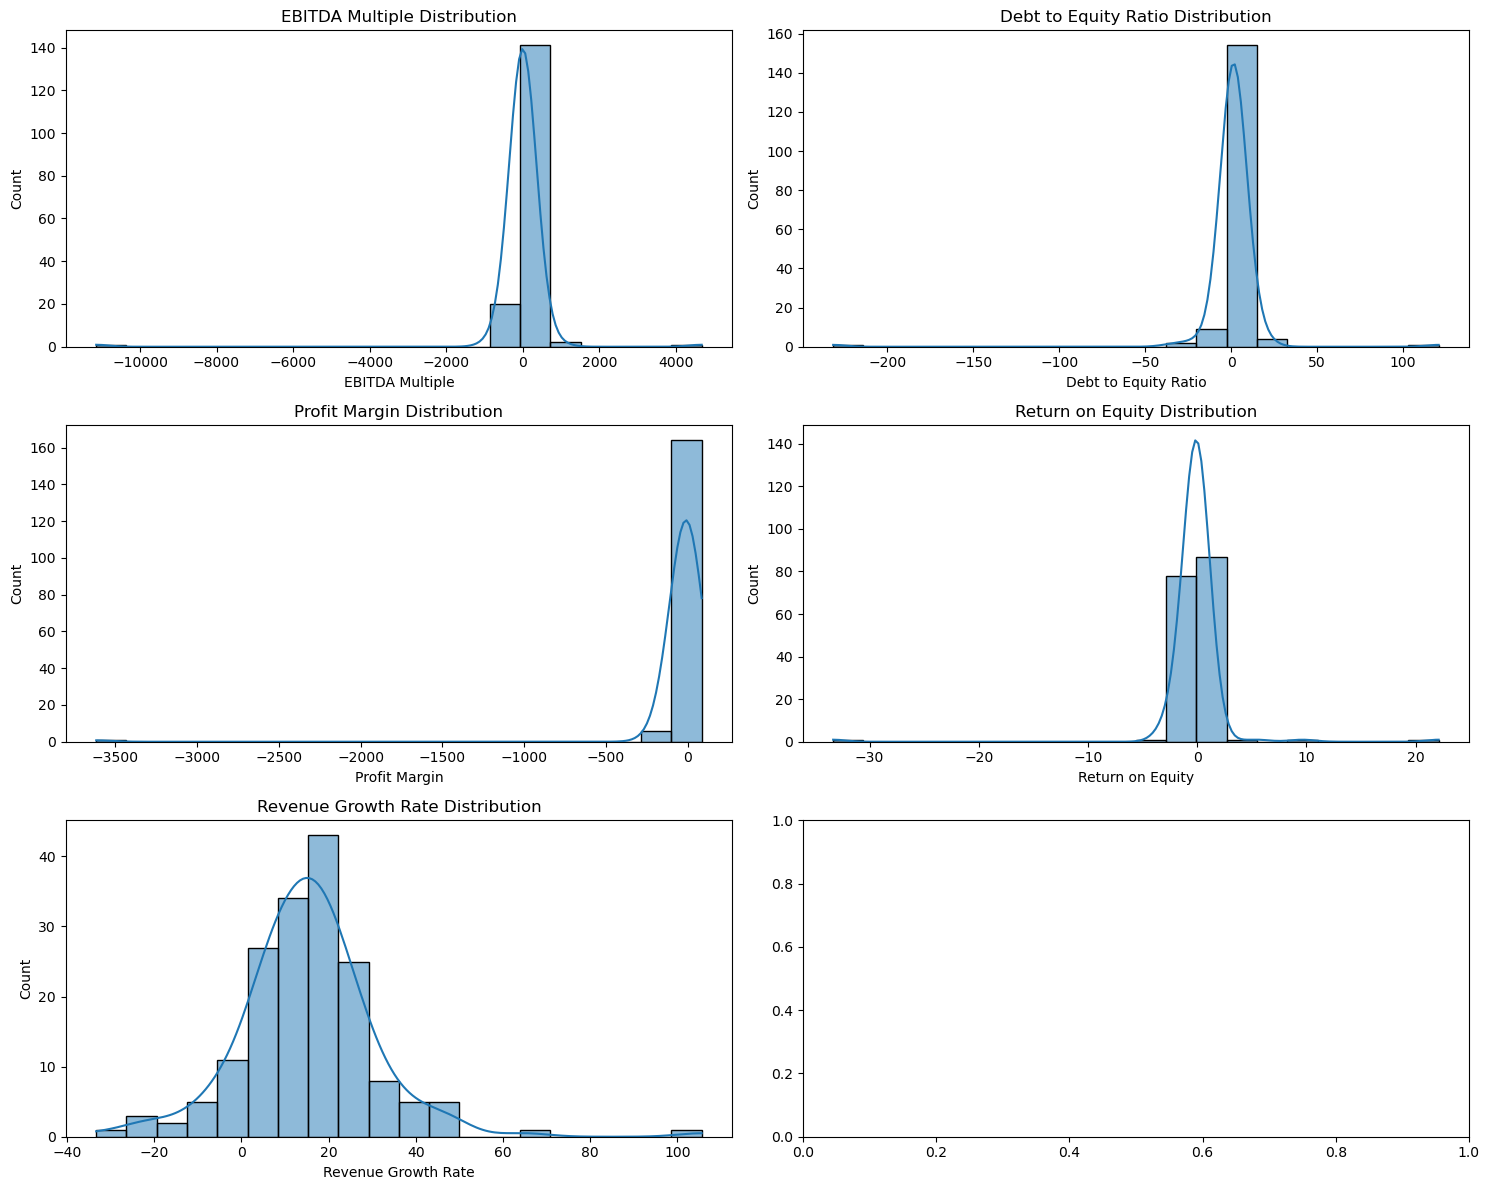

In [2]:
#take most important metrics from valuation_metrics
#debt levels, profit levels, and return on investment metrics :0

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
valuation_metrics_df = pd.read_csv('valuation_metrics_official.csv') #take our csv file that we just made

fig, axs = plt.subplots(3, 2, figsize=(15, 12))

sns.histplot(valuation_metrics_df['EBITDA Multiple'], bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('EBITDA Multiple Distribution')

sns.histplot(valuation_metrics_df['Debt to Equity Ratio'], bins=20, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Debt to Equity Ratio Distribution')

sns.histplot(valuation_metrics_df['Profit Margin'], bins=20, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Profit Margin Distribution')

sns.histplot(valuation_metrics_df['Return on Equity'], bins=20, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Return on Equity Distribution')

sns.histplot(valuation_metrics_df['Revenue Growth Rate'], bins=20, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Revenue Growth Rate Distribution')

plt.tight_layout()
plt.show()




After analyzing these graphs, we can see that the primary valuation metrics have mostly normal distributions. However, ROE, Profit margin, EBITDA and Debt to Equity Ratio are slightly left skewed, indicating that most SaaS companies leverage higher debt levels for higher returns and profit. This makes sense, because SaaS companies invest heavily into research and development to continue innovating with new technologies. 

However, I want to look at the relationship of these variables through a more detailed correlation matrix.

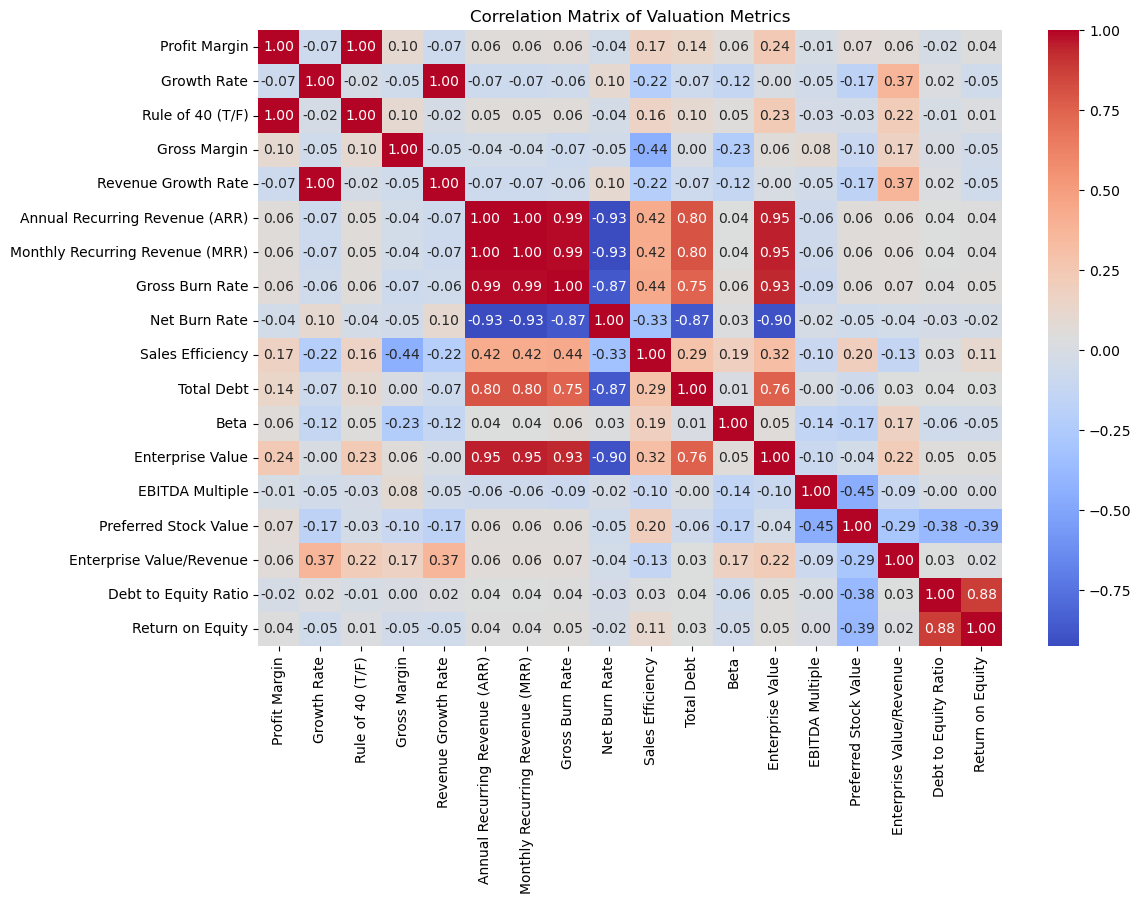

In [4]:
# Drop non-numeric columns
numeric_columns_df = valuation_metrics_df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_columns_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Valuation Metrics')
plt.show()


Towards the center of the correlation matrix, we can see that some profit, revenue and debt indicators have strong correlations with values such as the Enterprise value, sales efficiency, and debt levels. This shows that a Discounted Cash Flow analysis can help value SaaS businesses because the highest correlating factors are also all factors involved in a DCF analysis! 

Let's look at the strongest correlating factors in a pairplot to delve deeper into their relationships, and why they might be effective at valuation.

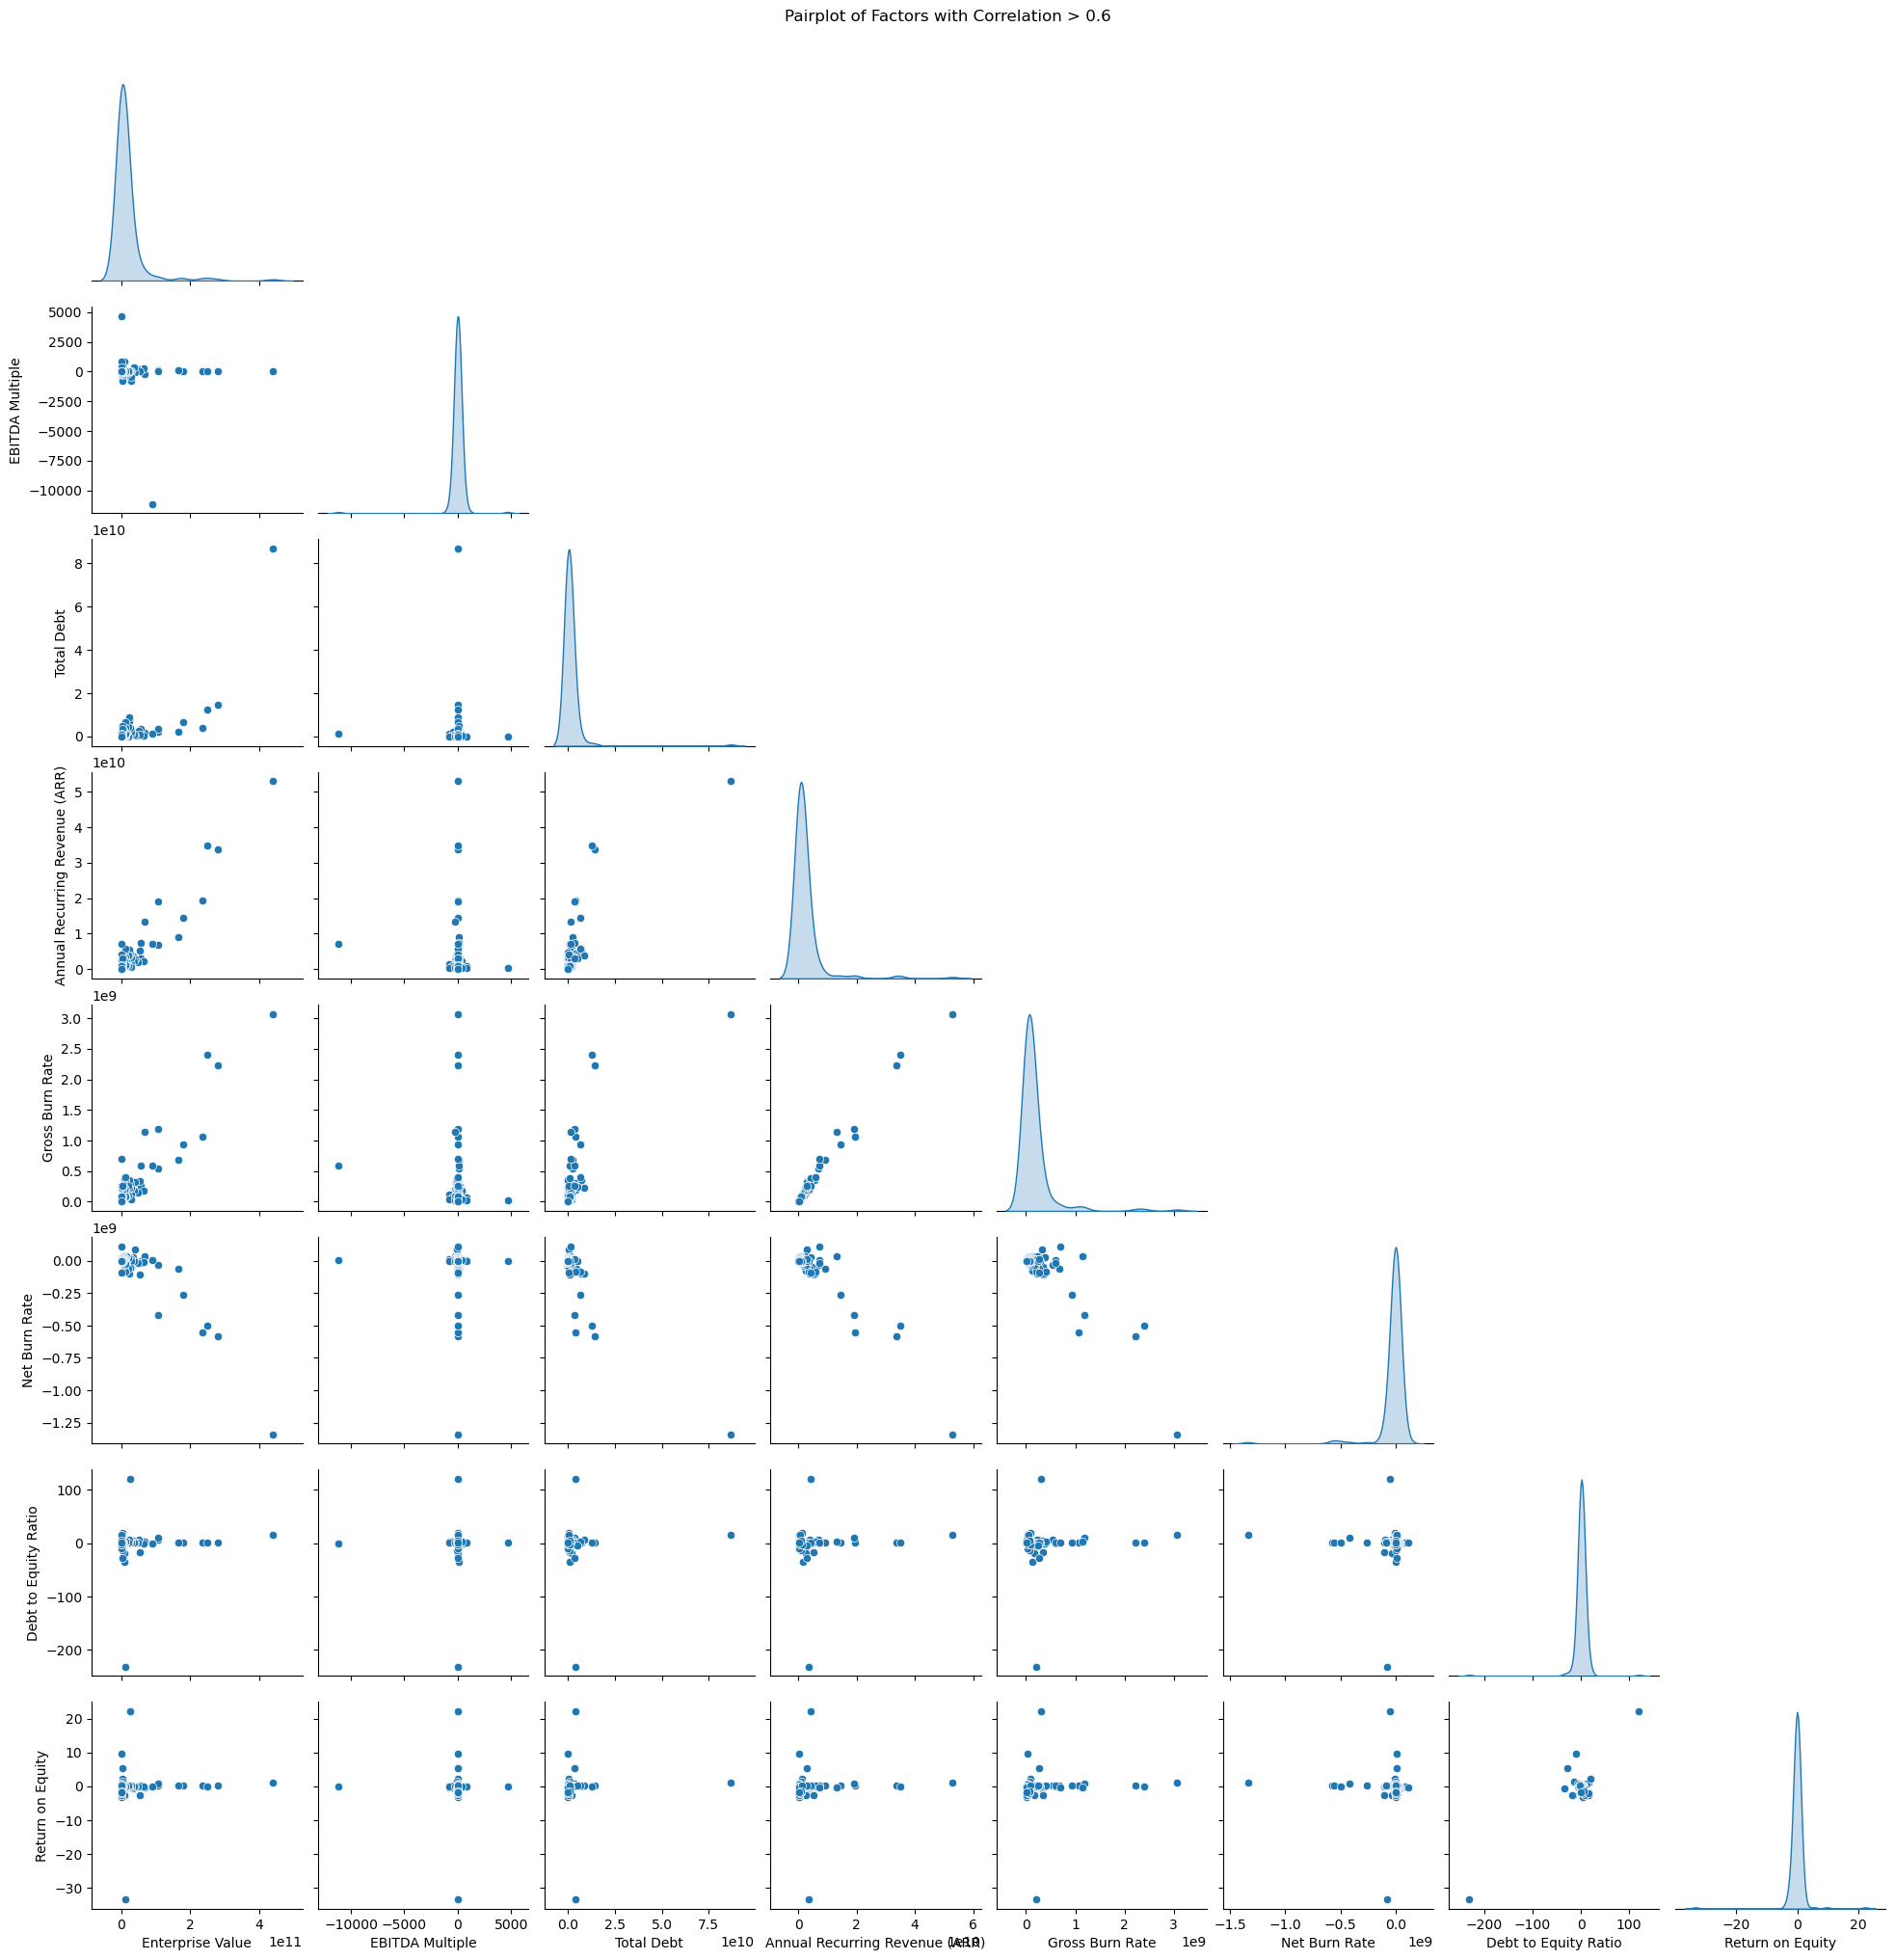

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns with correlations > 0.6 or < -0.6
high_corr_columns = ['Enterprise Value', 'EBITDA Multiple', 'Total Debt', 'Annual Recurring Revenue (ARR)', 
                     'Gross Burn Rate', 'Net Burn Rate', 'Debt to Equity Ratio', 'Return on Equity']

# Create a pairplot to visualize relationships between the high-correlation factors
sns.pairplot(valuation_metrics_df[high_corr_columns], diag_kind='kde', corner=True)

plt.suptitle('Pairplot of Factors with Correlation > 0.6', y=1.02)
plt.show()

Key Insights:

Enterprise Value vs. Annual Recurring Revenue (ARR): The scatterplot shows a positive relationship, which is consistent with the high correlation (0.95). This suggests that companies with higher ARR tend to have higher Enterprise Values, reinforcing the idea that recurring revenue is a key driver of company valuation in the SaaS space.

Enterprise Value vs. EBITDA Multiple: There’s also a very strong positive correlation (0.95). Higher EBITDA multiples generally align with higher enterprise value, indicating that companies with efficient earnings generation (EBITDA) are more valuable.

Enterprise Value vs. Total Debt: This also shows a positive trend, though the relationship is weaker compared to ARR or EBITDA Multiple. This implies that companies with higher debt tend to have higher enterprise values, likely because larger firms may take on more debt to finance growth or acquisitions.

Gross Burn Rate vs. Net Burn Rate: The nearly perfect positive correlation (0.99) between these two metrics is reflected in the plot. This is expected, as Gross Burn Rate (total cash outflow) should closely track the Net Burn Rate (cash outflow after accounting for cash inflows).
Debt and Equity:

Debt to Equity Ratio vs. Return on Equity: There’s a positive correlation (0.88) between these two factors, meaning that companies with higher leverage (more debt relative to equity) tend to show higher returns on equity. This can happen because leveraging debt magnifies returns when a company performs well, though it also increases financial risk.

Total Debt and EBITDA Multiple: While these factors have moderate correlation values, the scatterplot shows considerable dispersion, meaning that debt alone does not strongly dictate a company’s EBITDA multiple.

Let's tie this all together in our "pre" - DCF analysis!